# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [0]:
# Download the data
#!wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

In [0]:
#!curl https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

In [3]:
# check if the data is downloaded
%ls -l

total 28
-rw-r--r-- 1 root root 23628 Jun  5 06:51 pima-indians-diabetes.csv
drwxr-xr-x 1 root root  4096 May 31 16:17 sample_data/


In [4]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [7]:
dataset.shape

(768, 9)

In [0]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,0:8]
y = dataset[:,8]

In [9]:
# print the shape of x
#
X.shape

(768, 8)

In [10]:
# save to number of input dimensions in input_dim
input_dim = len(X.shape)
input_dim

2

In [11]:
# shape of y
y.shape

(768,)

In [0]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, stratify=y, random_state=42)

In [13]:
# shape of X_test
# TODO
X_test.shape

(116, 8)

# Model

In [0]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.fit(X, y, validation_split=0.15, epochs=300, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Train on 652 samples, validate on 116 samples
Epoch 1/300
652/652 [==============================] - 1s 1ms/step - loss: 4.0396 - acc: 0.6549 - val_loss: 2.3912 - val_acc: 0.5259
Epoch 2/300
652/652 [==============================] - 0s 124us/step - loss: 1.1686 - acc: 0.5445 - val_loss: 0.8881 - val_acc: 0.5345
Epoch 3/300
652/652 [==============================] - 0s 126us/step - loss: 0.7982 - acc: 0.6273 - val_loss: 0.9685 - val_acc: 0.5862
Epoch 4/300
652/652 [==============================] - 0s 124us/step - loss: 0.7193 - acc: 0.6472 - val_loss: 0.9219 - val_acc: 0.6034
Epoch 5/300
652/652 [==============================] - 0s 122us/step - loss: 0.7077 - acc: 0.6580 - val_loss: 0.7225 - val_acc: 0.6121
Epoch 6/300
652/652 [==============================] - 0s 125us/step - loss: 0.6784 - acc: 0.6733 - val_loss: 0.7127 - val_acc: 0.6207
Epoch 7/300
652/652 [==============================] - 0s 131us/step - loss: 0.6685 - acc: 0.6810 

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


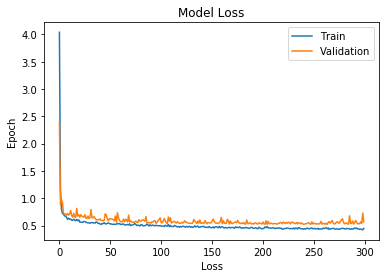

In [18]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

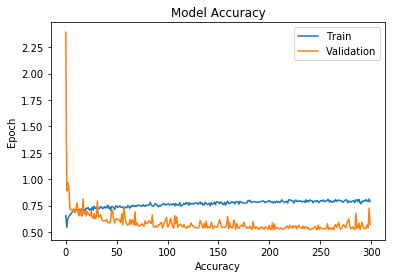

In [19]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_loss'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

116/116 [==============================] - 0s 72us/step


In [21]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.4379977239616986
Test accuracy: 0.7672413751996797
